# World Happiness & Germany Happiness_5

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
#### 5. Conclusions

#### 1. Importing libraries and data and renaming columns

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [6]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [7]:
# Shortcutpath
path=r'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/Achievement 6/'
path

'/Users/yevgeniyaem/Documents/Weiterbildung Data Analytics/Achievement 6/'

In [8]:
# Import cleaned data set
whr= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_report_rounded_values.csv'), index_col = False)

In [9]:
whr.shape

(1233, 12)

In [10]:
whr.head()

,Unnamed: 0,country,region,happiness_rank,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity,logged_gdp_per_capita,year
0,132,Afghanistan,South Asia,135.0,3.6,0.3,23.4,0.2,0.1,0.4,5.8,2015
1,82,Albania,Central and Eastern Europe,83.0,5.0,0.8,62.8,0.4,0.1,0.1,6.8,2015
2,59,Algeria,Middle East and North Africa,60.0,5.6,1.1,47.7,0.3,0.2,0.1,6.8,2015
3,27,Argentina,Latin America and Caribbean,28.0,6.6,1.2,60.8,0.4,0.1,0.1,7.0,2015
4,109,Armenia,Central and Eastern Europe,112.0,4.4,0.8,56.4,0.2,0.0,0.1,6.6,2015


In [11]:
whr.columns

Index(['Unnamed: 0', 'country', 'region', 'happiness_rank', 'happiness_score',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'perceptions_of_corruption',
       'generosity', 'logged_gdp_per_capita', 'year'],
      dtype='object')

#### 2. The elbow technique

In [13]:
# Drop categorical columns and create a subset
whr_subset = whr.drop(columns=['Unnamed: 0', 'country', 'region'])

# Display the resulting subset
print(whr_subset.head())

   happiness_rank  happiness_score  social_support  healthy_life_expectancy  \
0           135.0              3.6             0.3                     23.4   
1            83.0              5.0             0.8                     62.8   
2            60.0              5.6             1.1                     47.7   
3            28.0              6.6             1.2                     60.8   
4           112.0              4.4             0.8                     56.4   

   freedom_to_make_life_choices  perceptions_of_corruption  generosity  \
0                           0.2                        0.1         0.4   
1                           0.4                        0.1         0.1   
2                           0.3                        0.2         0.1   
3                           0.4                        0.1         0.1   
4                           0.2                        0.0         0.1   

   logged_gdp_per_capita  year  
0                    5.8  2015  
1             

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(whr_subset).score(whr_subset) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2380750.997988646,
 -834487.4886233663,
 -537167.6181789391,
 -404105.66540087195,
 -357549.6203183367,
 -267953.84618194005,
 -232993.39112654835,
 -195254.11597123038,
 -166877.69911157805]

In [16]:
# Check the X values
# Check for infinite values
has_inf = np.isinf(whr_subset).any()
print("Does the dataset contain infinite values?", has_inf)

# Check for extremely large values
print("Max value in the dataset:", np.max(whr_subset))
print("Min value in the dataset:", np.min(whr_subset))

Does the dataset contain infinite values? happiness_rank                  False
happiness_score                 False
social_support                  False
healthy_life_expectancy         False
freedom_to_make_life_choices    False
perceptions_of_corruption       False
generosity                      False
logged_gdp_per_capita           False
year                            False
dtype: bool
Max value in the dataset: 2023.0
Min value in the dataset: -0.3


In [17]:
# Handle infinit or large values
# Replace infinite values with NaN
whr_subset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the column median (or another strategy)
whr_subset.fillna(whr_subset.median(), inplace=True)



In [18]:
# Re-Check the X values
# Check for infinite values
has_inf = np.isinf(whr_subset).any()
print("Does the dataset contain infinite values?", has_inf)

# Check for extremely large values
print("Max value in the dataset:", np.max(whr_subset))
print("Min value in the dataset:", np.min(whr_subset))

Does the dataset contain infinite values? happiness_rank                  False
happiness_score                 False
social_support                  False
healthy_life_expectancy         False
freedom_to_make_life_choices    False
perceptions_of_corruption       False
generosity                      False
logged_gdp_per_capita           False
year                            False
dtype: bool
Max value in the dataset: 2023.0
Min value in the dataset: -0.3


In [19]:
# Re-run the k-means score
score = [kmeans[i].fit(whr_subset).score(whr_subset) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2380750.9979886464,
 -834487.4886233665,
 -537167.618178939,
 -404105.66540087195,
 -344358.76094643166,
 -268030.7757997085,
 -224109.7495006175,
 -195346.32765640007,
 -166888.52942687986]

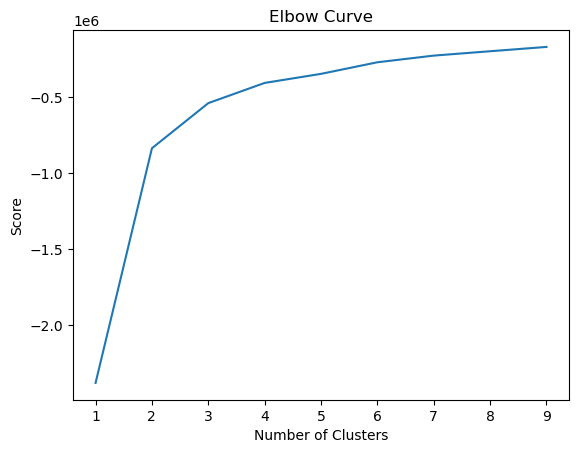

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is three.

#### 3. k-means clustering

In [23]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [24]:
# Fit the k-means object to the data.
kmeans.fit(whr_subset)

KMeans(n_clusters=3)

In [25]:
whr_subset['clusters'] = kmeans.fit_predict(whr_subset)

In [26]:
whr_subset.head()

,happiness_rank,happiness_score,social_support,healthy_life_expectancy,freedom_to_make_life_choices,perceptions_of_corruption,generosity,logged_gdp_per_capita,year,clusters
0,135.0,3.6,0.3,23.4,0.2,0.1,0.4,5.8,2015,0
1,83.0,5.0,0.8,62.8,0.4,0.1,0.1,6.8,2015,2
2,60.0,5.6,1.1,47.7,0.3,0.2,0.1,6.8,2015,2
3,28.0,6.6,1.2,60.8,0.4,0.1,0.1,7.0,2015,1
4,112.0,4.4,0.8,56.4,0.2,0.0,0.1,6.6,2015,0


In [27]:
whr_subset['clusters'].value_counts()

clusters
2    424
1    424
0    385
Name: count, dtype: int64

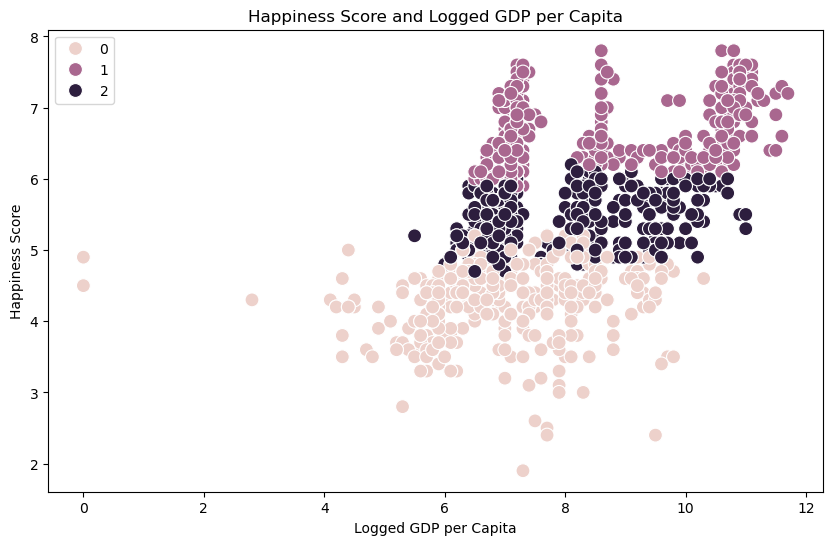

<Figure size 640x480 with 0 Axes>

In [28]:
# Plot the clusters for the "Happiness Score" and "Logged GDP per Capita" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=whr_subset['logged_gdp_per_capita'], y=whr_subset['happiness_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Logged GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Happiness Score and Logged GDP per Capita') # Label title
plt.show()

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "hps_gdp_cluster.png"), dpi=300, bbox_inches='tight')
plt.show()

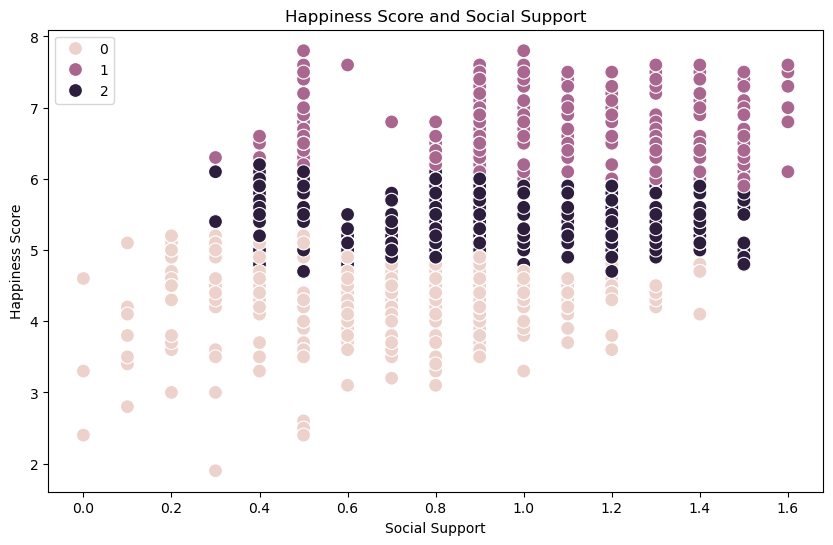

<Figure size 640x480 with 0 Axes>

In [29]:
# Plot the clusters for the "Happiness Score" and "Social Support" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=whr_subset['social_support'], y=whr_subset['happiness_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social Support') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Happiness Score and Social Support') # Label title
plt.show()

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "hps_social_support_cluster.png"), dpi=300, bbox_inches='tight')
plt.show()

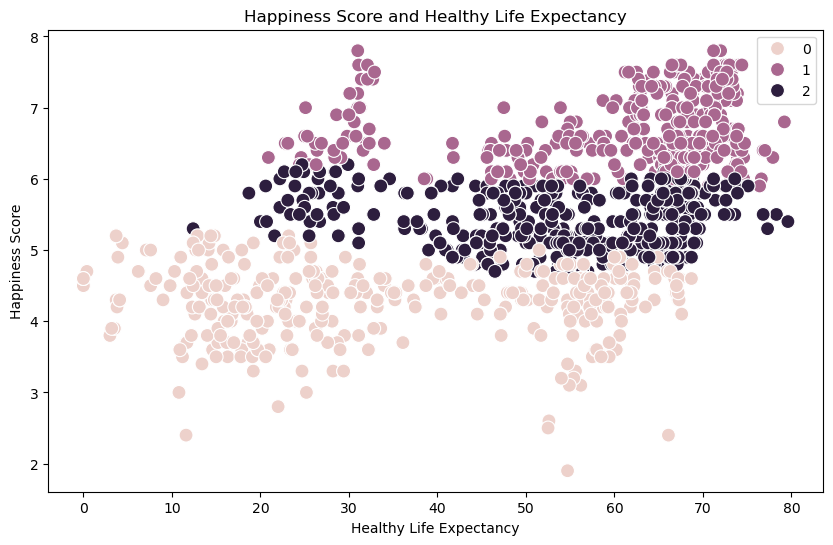

<Figure size 640x480 with 0 Axes>

In [30]:
# Plot the clusters for the "Happiness Score" and "Healthy Life Expectancy" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=whr_subset['healthy_life_expectancy'], y=whr_subset['happiness_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Healthy Life Expectancy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Happiness Score and Healthy Life Expectancy') # Label title
plt.show()

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "hps_hle_cluster.png"), dpi=300, bbox_inches='tight')
plt.show()

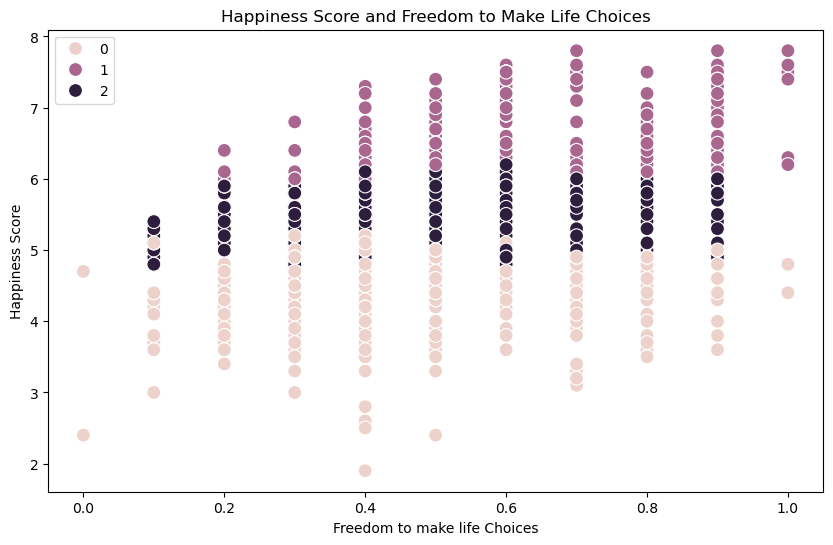

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot the clusters for the "Happiness Score" and "Freedom to make life Choices" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=whr_subset['freedom_to_make_life_choices'], y=whr_subset['happiness_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom to make life Choices') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Happiness Score and Freedom to Make Life Choices') # Label title
plt.show()

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "hps_freedom_cluster.png"), dpi=300, bbox_inches='tight')
plt.show()

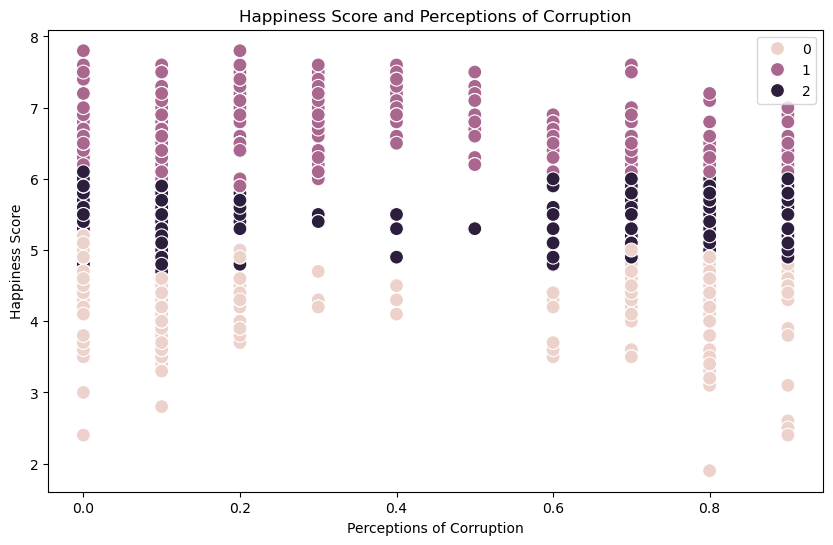

<Figure size 640x480 with 0 Axes>

In [32]:
# Plot the clusters for the "Happiness Score" and "Perceptions of Corruption" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=whr_subset['perceptions_of_corruption'], y=whr_subset['happiness_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Perceptions of Corruption') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Happiness Score and Perceptions of Corruption') # Label title
plt.show()

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "hps_corruption_cluster.png"), dpi=300, bbox_inches='tight')
plt.show()


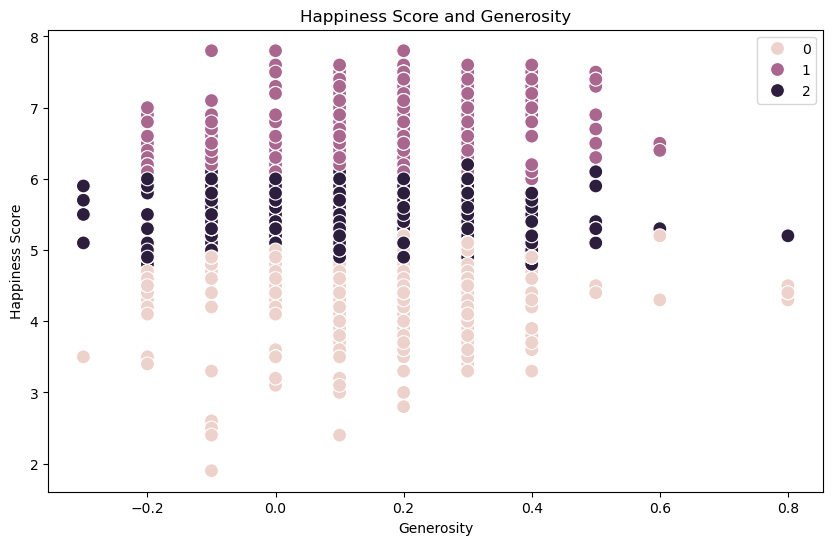

<Figure size 640x480 with 0 Axes>

In [33]:
# Plot the clusters for the "Happiness Score" and "Generosity" variables.

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=whr_subset['generosity'], y=whr_subset['happiness_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.title('Happiness Score and Generosity') # Label title
plt.show()

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', "hps_generosity_cluster.png"), dpi=300, bbox_inches='tight')
plt.show()


#### 4. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.



In [35]:
# Descriptive statistics for clusters 
whr_subset.loc[whr_subset['clusters'] == 2, 'cluster'] = 'dark purple'
whr_subset.loc[whr_subset['clusters'] == 1, 'cluster'] = 'purple'
whr_subset.loc[whr_subset['clusters'] == 0, 'cluster'] = 'pink'

In [36]:
whr_subset.groupby('cluster').agg({'happiness_score':['mean', 'median'], 
                         'logged_gdp_per_capita':['mean', 'median'], 
                         'freedom_to_make_life_choices':['mean', 'median'],
                          'social_support':['mean', 'median'],
                          'healthy_life_expectancy':['mean', 'median'],
                          'perceptions_of_corruption':['mean', 'median'],
                          'generosity':['mean', 'median']})

happiness_score        logged_gdp_per_capita         \
                       mean median                  mean median   
cluster                                                           
dark purple        5.430896    5.4              7.883255    7.2   
pink               4.275325    4.4              6.938961    6.8   
purple             6.709670    6.6              8.422642    7.3   

            freedom_to_make_life_choices        social_support         \
                                    mean median           mean median   
cluster                                                                 
dark purple                     0.546698    0.5       0.927358    0.9   
pink                            0.470909    0.4       0.729091    0.7   
purple                          0.646934    0.6       1.084670    1.0   

            healthy_life_expectancy        perceptions_of_corruption         \
                               mean median                      mean median   
cluster                                                                       
dark purple               53.996698   55.0                  0.332075    0.1   
pink                      34.712987   30.8                  0.282857    0.1   
purple                    61.297170   66.2                  0.324528    0.3   

            generosity         
                  mean median  
cluster                        
dark purple   0.114387    0.1  
pink          0.160519    0.2  
purple        0.167217    0.2

#### 5. Conclusions
##### Clusters
##### How and Why the Clusters Make Sense
##### - Dark Purple Cluster:
##### Characteristics: Moderate happiness scores (mean = 5.506), moderate GDP per capita (mean = 3.308), and moderate levels of social support (mean = 0.736) and healthy life expectancy (mean = 0.637).
##### Interpretation: This cluster likely represents countries with average economic and social conditions. They are neither the happiest nor the least happy, and their determinants of happiness are balanced.
##### - Pink Cluster:
##### Characteristics: Lower happiness scores (mean = 4.306), lower GDP per capita (mean = 2.495), and lower levels of social support (mean = 0.579) and healthy life expectancy (mean = 0.384).
##### Interpretation: This cluster likely represents less developed or economically struggling countries. The lower happiness scores align with lower economic and social indicators.
##### - Purple Cluster:
##### Characteristics: Higher happiness scores (mean = 6.740), higher GDP per capita (mean = 3.795), and higher levels of social support (mean = 0.843) and healthy life expectancy (mean = 0.782).
##### Interpretation: This cluster likely represents developed or economically prosperous countries. The higher happiness scores align with better economic and social conditions.

##### These clusters make sense because economic factors (GDP, social support, health, and freedom) directly influence happiness. The pattern aligns with expectations:

##### Countries with higher GDP per capita and strong social support tend to have higher happiness scores.
##### Countries with lower GDP and weaker social support report lower happiness.
##### However, some scatter in the data suggests that GDP alone isn’t the sole factor driving happiness—other factors (like perceptions of corruption and generosity) might play a role.


##### Key Findings from Descriptive Statistics
##### - Happiness Scores:
##### The Purple Cluster has the highest mean happiness score (6.740), followed by the Dark Purple Cluster (5.506) and the Pink Cluster (4.306).
##### This suggests that economic and social factors strongly influence happiness.
##### - Logged GDP per Capita:
##### The Purple Cluster has the highest GDP (mean = 3.795), followed by the Dark Purple Cluster (mean = 3.308) and the Pink Cluster (mean = 2.495).
##### This confirms that GDP per capita is a key determinant of happiness.
##### - Social Support and Healthy Life Expectancy:
##### The Purple Cluster has the highest levels of social support (mean = 0.843) and healthy life expectancy (mean = 0.782), followed by the Dark Purple Cluster and the Pink Cluster.
##### These factors are strongly correlated with higher happiness scores.
##### - Freedom to Make Life Choices:
##### The Purple Cluster has the highest freedom scores (mean = 0.645), followed by the Dark Purple Cluster (mean = 0.544) and the Pink Cluster (mean = 0.485).
##### Freedom is an important factor for happiness, especially in developed countries.
##### - Perceptions of Corruption and Generosity:
##### The Pink Cluster has the highest perceptions of corruption (mean = 0.301), which may contribute to lower happiness scores.
##### Generosity is relatively consistent across clusters, suggesting it has a weaker influence on happiness compared to other factors.

##### In the nutshell:
##### Happier countries (Purple) have the highest GDP, social support, and life expectancy.
##### The least happy cluster (Pink) has lower GDP, social support, and life expectancy but slightly higher generosity.
##### Perception of corruption is nearly the same across clusters, suggesting it may not be a strong differentiator.

##### What Could These Insights Be Useful For?
##### Policy recommendations: Governments can focus on economic growth, healthcare, and social trust to improve happiness.
##### Further Analysis: Explore causation vs. correlation—for example, does social support directly impact happiness, or does GDP drive both?
##### Predictive Modeling: Use these clusters as a foundation to predict happiness scores for different countries based on economic and social factors.